In [40]:
import pymysql
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [41]:
sql = 'select * from rent_info'
conn = pymysql.connect(host = '127.0.0.1', user = 'root', password = 'root', port = 3306, db = 'wuhan', charset = 'utf8')
df = pd.read_sql(sql, con=conn )

In [155]:
df.describe()

,square,price,house_age
count,19260.000000,19260.000000,19260.000000
mean,91.001661,3237.042212,11.082139
std,51.851602,3057.123333,6.473414
min,6.000000,500.000000,0.000000
25%,62.000000,2100.000000,6.000000
50%,88.000000,2600.000000,11.000000
75%,106.000000,3500.000000,14.000000
max,1100.000000,60000.000000,33.000000


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260 entries, 0 to 19259
Data columns (total 13 columns):
area            19260 non-null object
title           19260 non-null object
detail_place    19260 non-null object
room_type       19260 non-null object
square          19260 non-null int64
position        19260 non-null object
floor           19260 non-null object
total_floor     19260 non-null object
house_year      19260 non-null object
price           19260 non-null int64
tags            19260 non-null object
house_age       19260 non-null int64
square_level    19238 non-null category
dtypes: category(1), int64(3), object(9)
memory usage: 1.8+ MB


In [158]:
df['square'].median()

88.0

In [159]:
df['price'].median()

2600.0

In [44]:

df['title'] = df['title'].str.strip()
df['room_type'] = df['room_type'].str.strip()
df['floor'] = df['floor'].str.strip()
df['position'] = df['position'].str.strip()
df['house_year'] = df['house_year'].fillna(method = 'ffill')

In [45]:
df[['square', 'price']]=df[['square', 'price']].astype(np.int64)

In [46]:
df['house_year'].replace("",np.nan,inplace = True)

In [47]:
df['house_year'].fillna(method = 'ffill',inplace = True)
df['house_year'].values.astype(np.int64)

array([1999, 2005, 2009, ..., 2013, 2005, 2005])

Text(0,0.5,'房源数量&平均价格')

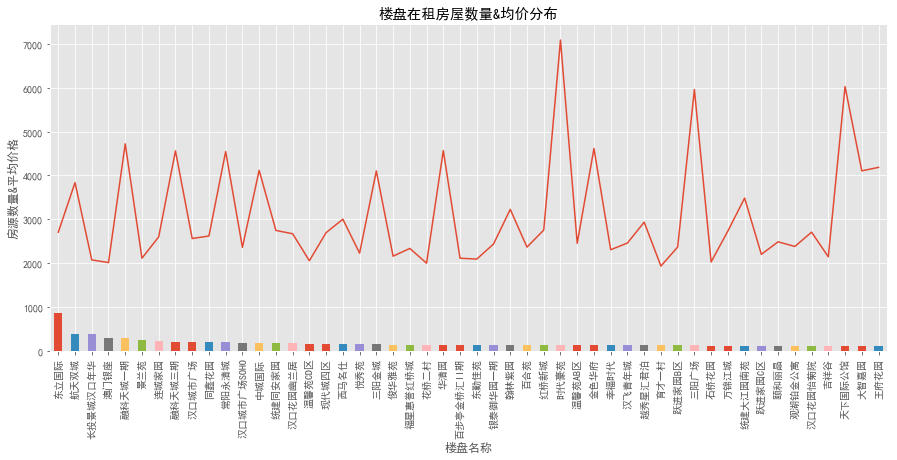

In [111]:
name = DataFrame(df['title'].value_counts())
name['avg_price'] = df.groupby('title')['price'].mean()
name = name[name['title']>100]
name['title'].plot(kind = 'bar',rot = 90,figsize = (15,6))
name['avg_price'].plot(rot = 90,figsize = (15,6))
plt.title('楼盘在租房屋数量&均价分布')
plt.xlabel('楼盘名称')
plt.ylabel('房源数量&平均价格')

In [115]:
df['detail_place'].value_counts().reset_index()

,index,detail_place
0,百步亭,3936
1,台北香港路,2381
2,后湖,2198
3,二七,2115
4,三阳路,2046
5,塔子湖,1898
6,育才花桥,1704
7,黄埔永清,1455
8,大智路,568
9,唐家墩,440


Text(0,0.5,'房源数量&平均价格')

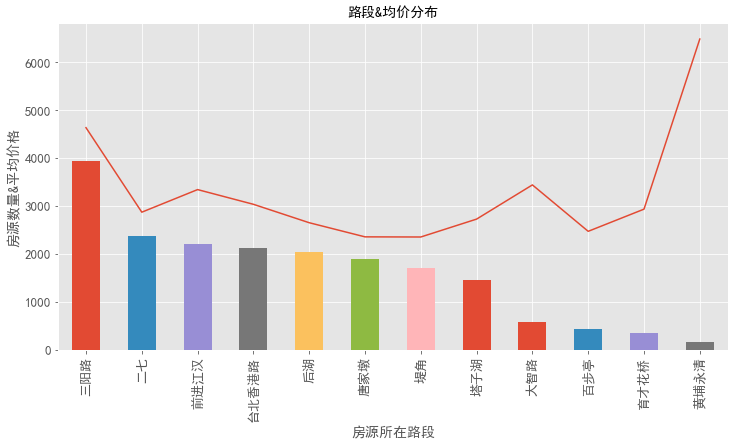

In [118]:
df['detail_place'].value_counts().plot(kind = 'bar',rot = 90,fontsize = 13,figsize = (12,6))
df[['detail_place', 'price']].groupby('detail_place')['price'].mean().plot(rot = 90,figsize = (12,6))
plt.title('路段&均价分布',fontsize = 14)
plt.xlabel('房源所在路段',fontsize = 14)
plt.ylabel('房源数量&平均价格',fontsize = 14)

Text(0.5,1,'房屋年龄分布')

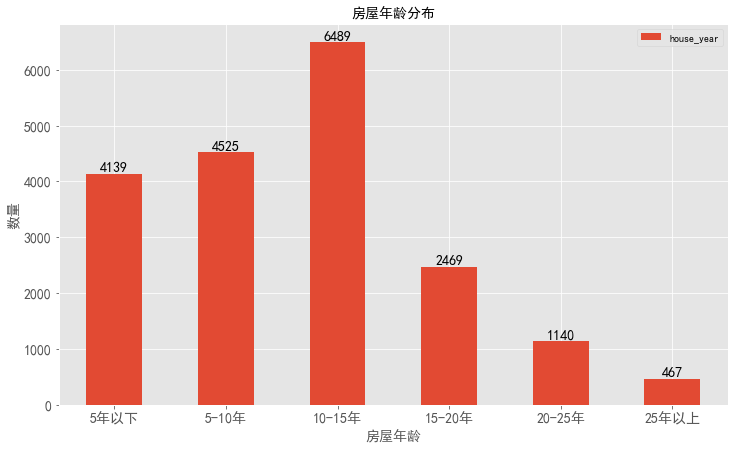

In [161]:
year = df['house_year'].value_counts().reset_index()
year['house_age'] = 2018-year['index'].astype(np.int64)
year.sort_values(by = 'house_age')
bins = [0,5,10,15,20,25,35]
level = ["5年以下", '5-10年', '10-15年', '15-20年', '20-25年', '25年以上']
stage = pd.cut(year['house_age'], bins = bins, labels = level)
year['level'] =stage
age_info = year[['level','house_year']].groupby('level').sum()
age_info.plot.bar(rot = 0,figsize = (12,7),fontsize = 14)
for a,b in zip(np.arange(len(age_info.index)), age_info['house_year']):
    plt.text(a,b+0.05,'%.0f' %b, ha = 'center', va = 'bottom',fontsize = 14)
plt.xlabel("房屋年龄",fontsize = 14)
plt.ylabel("数量",fontsize = 14)
plt.title('房屋年龄分布',fontsize = 14)

In [189]:
df['house_age'] = [2018 - int(i) for i in df['house_year']]
df

,area,title,detail_place,room_type,square,position,floor,total_floor,house_year,price,tags,house_age,square_level
0,江岸,安居苑A区,百步亭,3室2厅,123,南北,中楼层,7,1999,2400,,19,120-150平
1,江岸,温馨苑AB区,百步亭,3室2厅,138,南北,高楼层,7,2005,2500,,13,120-150平
2,江岸,航天双城,二七,3室2厅,128,南,低楼层,27,2009,4500,距离1号线头道街站748米,9,120-150平
3,江岸,汉口花园幽兰居,塔子湖,2室2厅,90,南北,高楼层,11,2011,1950,距离6号线石桥站957米,7,60-90平
4,江岸,百合苑,百步亭,2室1厅,92,南,高楼层,6,2004,2400,,14,90-120平
5,江岸,百步亭花园世博园,百步亭,3室2厅,90,南,高楼层,9,2011,2400,,7,60-90平
6,江岸,新华路322到328号,台北香港路,2室1厅,75,南北,中楼层,8,2007,2600,,11,60-90平
7,江岸,东立国际,二七,1室1厅,41,东北,中楼层,18,2008,2000,距离3号线罗家庄站763米,10,30-60平
8,江岸,悦秀苑,百步亭,2室1厅,80,南,高楼层,18,2009,2300,,9,60-90平
9,江岸,统建同安家园,后湖,3室1厅,91,南,中楼层,18,2007,2700,距离3号线后湖大道站646米,11,90-120平


Text(0,0.5,'租金')

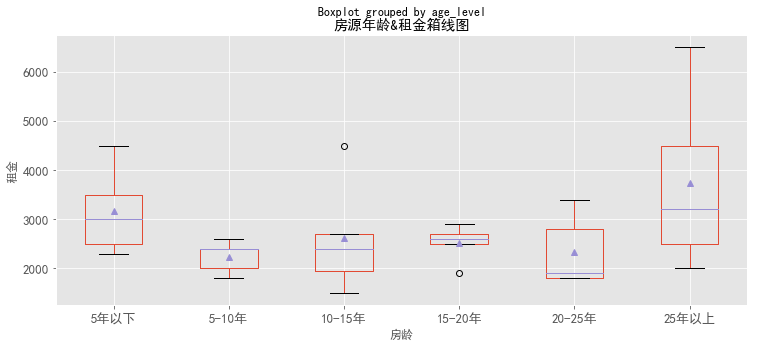

In [208]:
df['age_level'] = year['level']
df[['price', 'age_level']].dropna().boxplot(column = 'price', by = 'age_level',fontsize = 13,showmeans = True,figsize = (12,5))
plt.title('房源年龄&租金箱线图')
plt.xlabel('房龄')
plt.ylabel('租金')

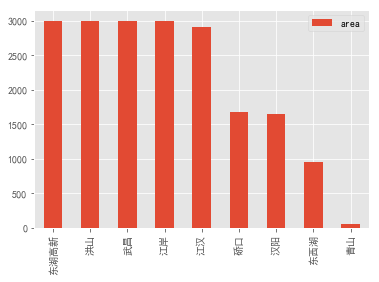

In [82]:
areas = df['area']
info = DataFrame(areas.value_counts().sort_values(ascending = False))
info.plot(kind = 'bar')

In [86]:
price = df.groupby('area')['price'].agg(np.mean).sort_values(ascending = False).reset_index()
price

,area,price
0,汉阳,3452.177576
1,硚口,3381.070238
2,武昌,3224.972667
3,东西湖,3214.850000
4,江汉,3203.975258
5,东湖高新,3197.190333
6,洪山,3191.847667
7,江岸,3182.045333
8,青山,2852.500000


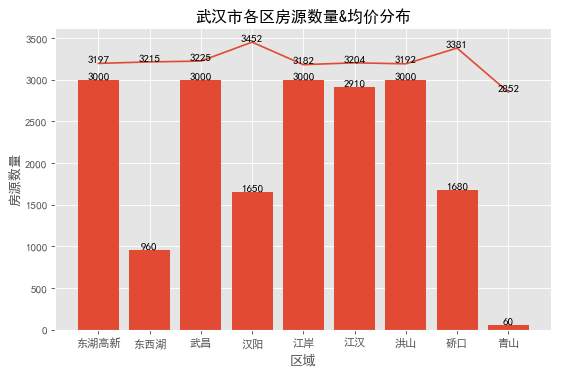

In [54]:
fig, ax = plt.subplots(figsize = (8,5), dpi = 80)
ax.bar(info.index, info['area'])
ax.plot(price.index, price.values)
ax.set(title = '武汉市各区房源数量&均价分布',xlabel = '区域', ylabel = '房源数量')
for a, b in zip(info.index, info['area']):
    ax.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
for a, b in zip(price.index, price.values):
    ax.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)

Text(0,0.5,'数量')

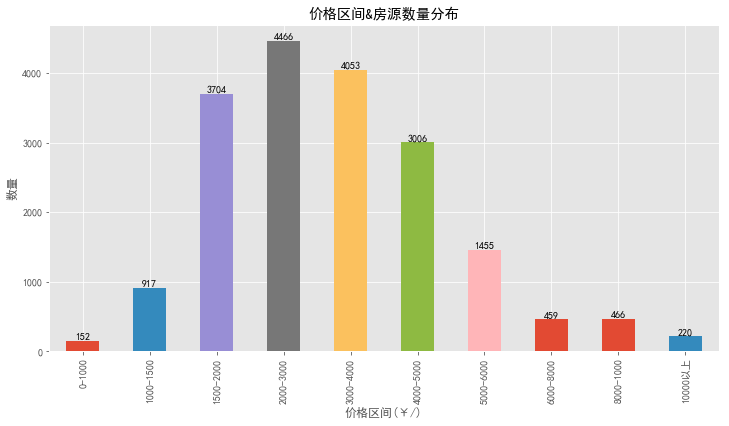

In [154]:
price_info = df[['area', 'price']]
bins = [0,1000,1500,2000,2500,3000,4000,5000,6000,8000,10000]
level = ['0-1000','1000-1500', '1500-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000-8000', '8000-1000','10000以上']
price_stage = pd.cut(price_info['price'], bins = bins,labels = level).value_counts().sort_index()
price_stage.plot(kind = 'bar',figsize = (12,6))
for a,b in zip(np.arange(len(price_stage.index)), price_stage.values):
    plt.text(a,b+0.5,'%.0f' %b,ha = 'center', va = 'bottom') 
plt.title("价格区间&房源数量分布")
plt.xlabel("价格区间(￥/)")
plt.ylabel("数量")

Text(0,0.5,'数量')

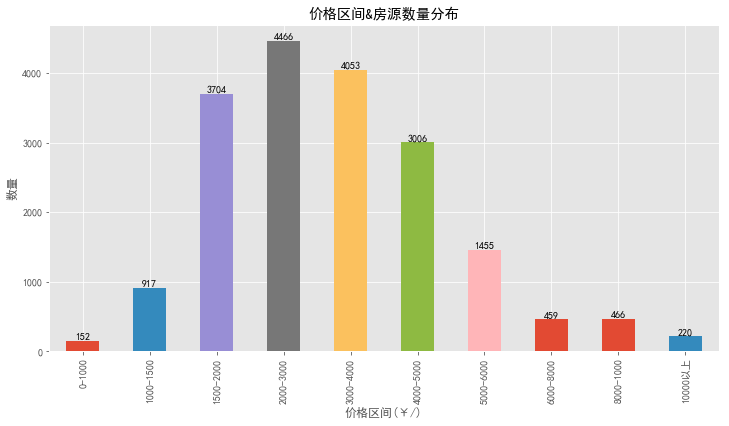

In [153]:
price_stage.plot(kind = 'bar',figsize = (12,6))
for a,b in zip(np.arange(len(price_stage.index)), price_stage.values):
    plt.text(a,b+0.5,'%.0f' %b,ha = 'center', va = 'bottom') 
plt.title("价格区间&房源数量分布")
plt.xlabel("价格区间(￥/)")
plt.ylabel("数量")

Text(0,0.5,'数量(/套)')

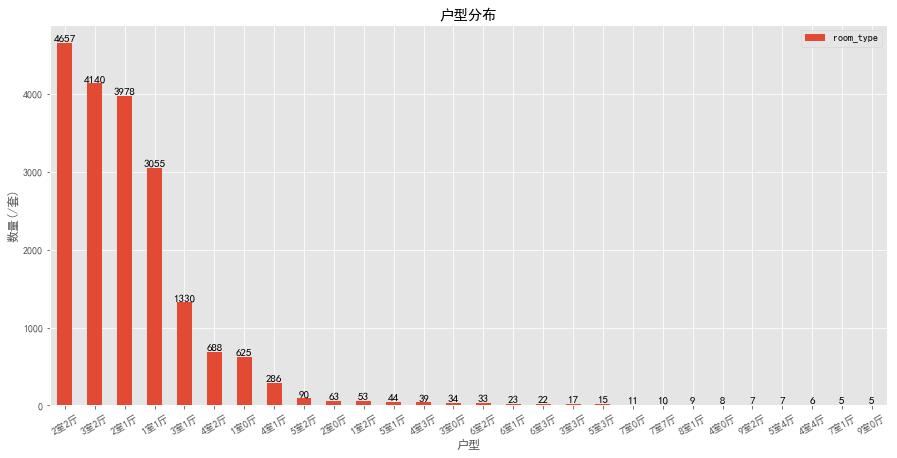

In [57]:
#户型分布
data = df['room_type'].value_counts().sort_values(ascending = False).reset_index()
data['price'] = df.groupby('room_type')['price'].mean().values
data[['index','room_type']].plot.bar(figsize = (15,7),x = data['index'],rot = 30)
for a,b in zip(data.index,data['room_type']):
    plt.text(a,b+0.05, '%.0f' % b ,ha = 'center', va = 'bottom',fontsize = 11)
plt.title('户型分布')
plt.xlabel('户型')
plt.ylabel('数量(/套)')

Text(0,0.5,'数量(/套)')

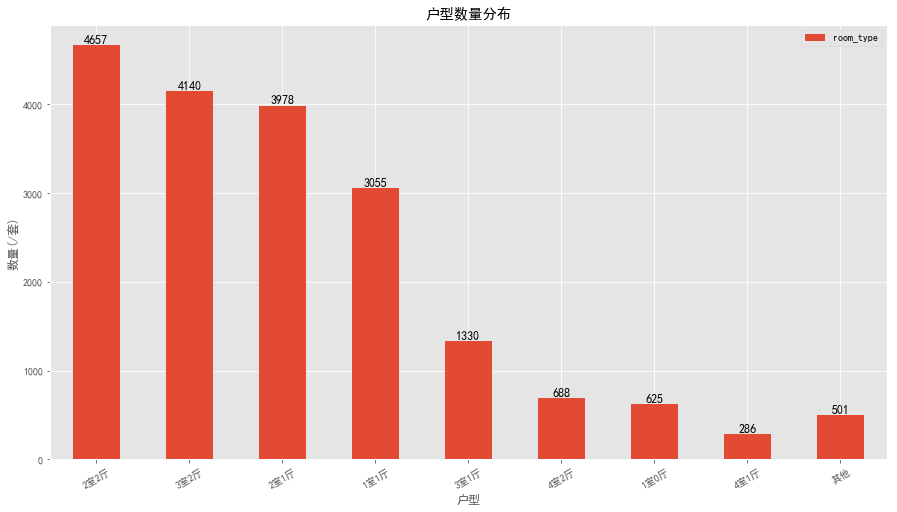

In [119]:
#将100套以下的同归为一类
data = df['room_type'].value_counts().sort_values(ascending = False).reset_index()
data = data.drop([i for i in range (8,28)],axis = 0).sort_values('room_type',ascending = False)
data.loc[8] = ['其他',501]
data.plot.bar(x = data['index'],figsize = (15,8),rot = 30)
for a,b in zip(data.index, data['room_type']):
    plt.text(a, b+0.7, '%.0f'% b,ha = 'center', va = 'bottom',fontsize = 12)
plt.title('户型数量分布')
plt.xlabel('户型')
plt.ylabel('数量(/套)')

Text(0,0.5,'均价(/月)')

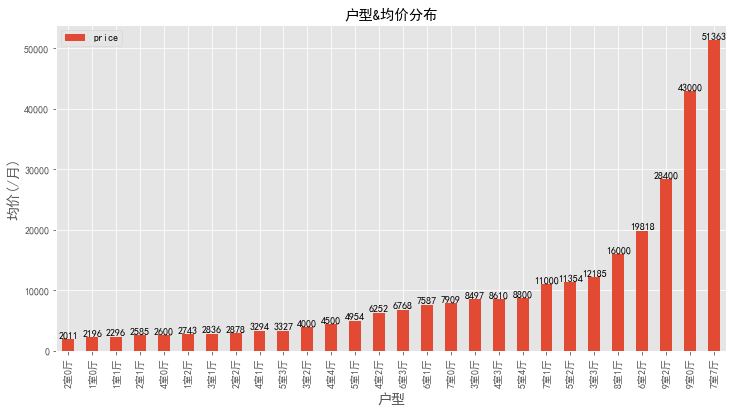

In [149]:
room = df.groupby('room_type')['price'].mean().sort_values().reset_index()
room.plot(kind = 'bar',figsize = (12,6),x = room['room_type'])
for a, b in zip(room.index, room['price']):
    plt.text(a, b+0.7, '%.0f'% b,ha = 'center', va = 'bottom',fontsize = 10)
plt.title('户型&均价分布')
plt.xlabel('户型',fontsize = 14)
plt.ylabel('均价(/月)',fontsize = 14)

Text(0.5,1,'房源面积分布')

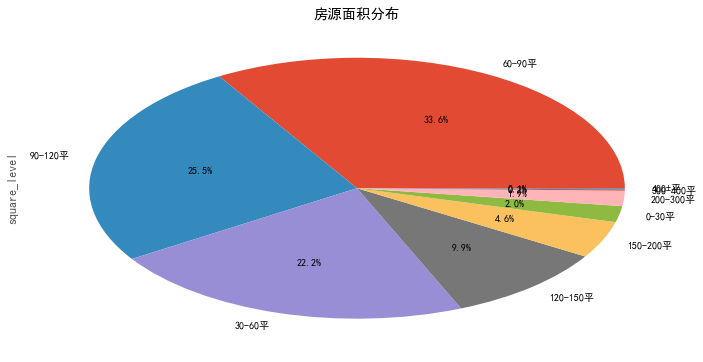

In [182]:
bins =[0,30,60,90,120,150,200,300,400,700]
level = ['0-30平', '30-60平', '60-90平', '90-120平', '120-150平', '150-200平', '200-300平','300-400平','400+平']
df['square_level'] = pd.cut(df['square'],bins = bins,labels = level)
df_digit= df[['area', 'room_type', 'square', 'position', 'total_floor', 'floor', 'house_year', 'price', 'square_level']]
s = df_digit['square_level'].value_counts()
s.plot.pie(autopct = '%1.1f%%',figsize = (12,6))
plt.title('房源面积分布')

Text(0.5,0,'房源面积')

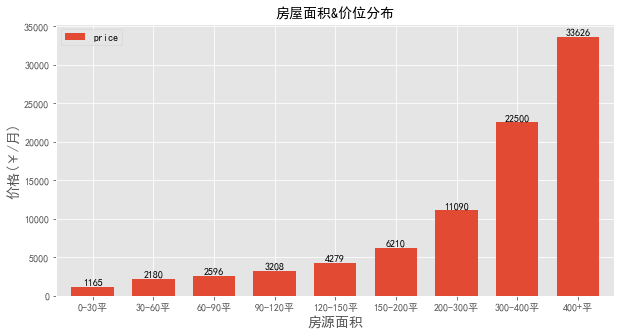

In [215]:
square = df_digit[['square_level','price']]
prices = square.groupby('square_level').mean().reset_index()
amount = square.groupby('square_level').count().reset_index()
x = prices['square_level']
y = prices['price']
prices.plot(kind = 'bar',x = x,figsize=(10,5),rot=0,width = 0.7)
for a,b in zip(prices.index, y):
    plt.text(a, b+100, '%.0f' % b,ha='center', va= 'bottom',fontsize=10)
plt.title('房屋面积&价位分布',fontsize = 14)
plt.ylabel('价格(￥/月)',fontsize = 14)
plt.xlabel('房源面积',fontsize = 14)

In [219]:
rent_30 = df[df['square']<30][['square', 'price']]

Text(0,0.5,'价格(￥/月)')

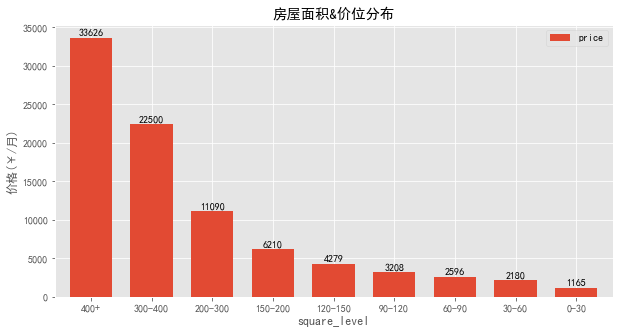

In [61]:
x = prices['square_level']
y = prices['price']
prices.plot(kind = 'bar',x = x,figsize=(10,5),rot=0,width = 0.7)

for a,b in zip(prices.index, y):
    plt.text(a, b+100, '%.0f' % b,ha='center', va= 'bottom',fontsize=10)
plt.title('房屋面积&价位分布')
plt.ylabel('价格(￥/月)')

Text(0,0.5,'房源数量')

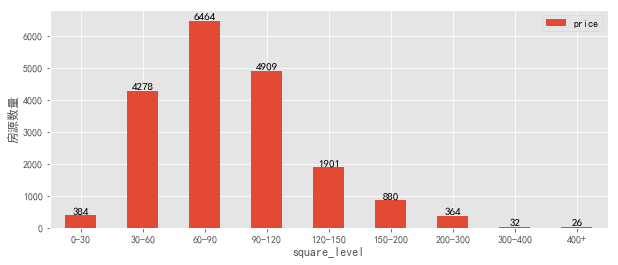

In [62]:
amount.plot(kind = 'bar',x = amount['square_level'], rot = 0,figsize=(10,4))
for a,b in zip(amount.index, amount['price']):
    plt.text(a,b+0.05, '%.0f' %b,ha='center', va= 'bottom',fontsize=11)
plt.ylabel('房源数量')

In [63]:
#楼层分布
df_digit.head()

,area,room_type,square,position,total_floor,floor,house_year,price,square_level
0,江岸,3室2厅,123,南北,7,中楼层,1999,2400,120-150
1,江岸,3室2厅,138,南北,7,高楼层,2005,2500,120-150
2,江岸,3室2厅,128,南,27,低楼层,2009,4500,120-150
3,江岸,2室2厅,90,南北,11,高楼层,2011,1950,60-90
4,江岸,2室1厅,92,南,6,高楼层,2004,2400,90-120


(-1.1076581328896888,
 1.1003646729947472,
 -1.102242277428936,
 1.1206718792590766)

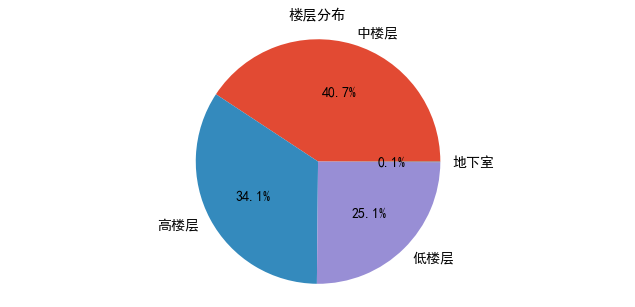

In [267]:
f = df_digit.groupby('floor')['floor'].count().sort_values(ascending = False)
f.plot.pie( labels = f.index,autopct = '%1.1f%%',figsize = (11,5), fontsize =14)
plt.title('楼层分布')
plt.ylabel("")
plt.axis("equal")

In [252]:
df_digit.head()

,area,room_type,square,position,total_floor,floor,house_year,price,square_level
0,江岸,3室2厅,123,南北,7,中楼层,1999,2400,120-150平
1,江岸,3室2厅,138,南北,7,高楼层,2005,2500,120-150平
2,江岸,3室2厅,128,南,27,低楼层,2009,4500,120-150平
3,江岸,2室2厅,90,南北,11,高楼层,2011,1950,60-90平
4,江岸,2室1厅,92,南,6,高楼层,2004,2400,90-120平


Text(0,0.5,'房源数量')

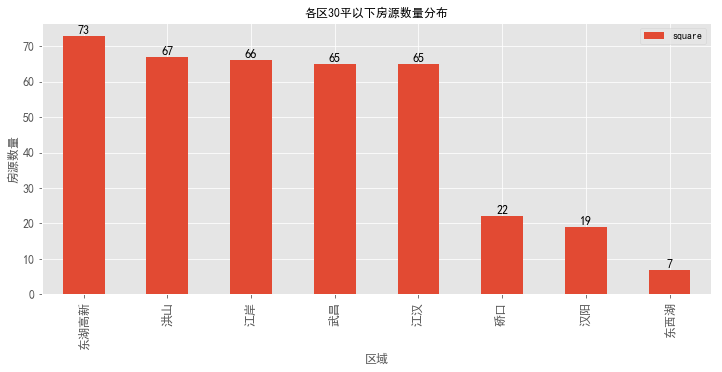

In [262]:
limit_30 = df_digit[df['square_level']=='0-30平']
info = limit_30[['area','square']].groupby('area').count().sort_values(by = 'square',ascending = False).reset_index()
info.plot.bar(x = info['area'], figsize = (12,5),fontsize= 12)
for a, b in zip(info.index, info['square']):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=12)
plt.title('各区30平以下房源数量分布', fontsize = 12)
plt.xlabel('区域', fontsize  =12)
plt.ylabel('房源数量',fontsize = 12)

Text(0.5,0,'区域')

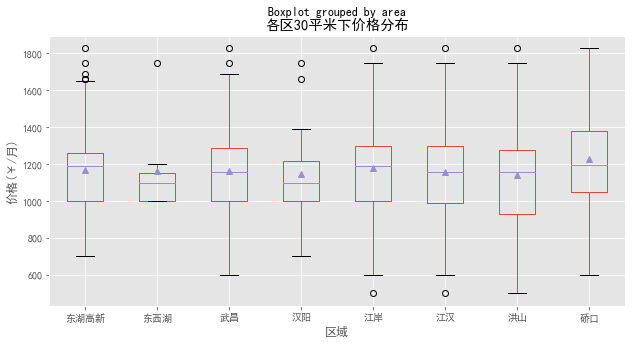

In [67]:
limit_30[[ 'price','area']].boxplot(column = 'price', by = 'area',showmeans = True,figsize = (10,5))
plt.title('各区30平米下价格分布')
plt.ylabel('价格(￥/月)')
plt.xlabel('区域')

In [280]:
from sklearn.cluster import KMeans
df_clean = df[['square','price','house_age']]
#使用房源总价，面积和关注度三个字段进行聚类
house_type = np.array(df[['square','price','house_age']])
#设置n_clusters=3
clf=KMeans(n_clusters=4)
#计算聚类结果
clf=clf.fit(house_type)

In [281]:
clf.cluster_centers_
df_clean['label']= clf.labels_

/home/lwl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [286]:
df_clean.groupby('label').mean()

,square,price,house_age
label,,,
0,78.473115,2418.531938,11.209964
1,555.306122,46706.734694,10.428571
2,222.067839,13753.618090,11.527638
3,126.084691,5108.203731,10.454842
